
# Project: Investigate a Dataset (No-show appointments Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


## DATASET 


#### Data Dictionary
- **01 - PatientId** :
Identification of a patient
- **02 - AppointmentID** :
Identification of each appointment
- **03 - Gender** :
Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
- **04 - DataMarcacaoConsulta** :
The day of the actuall appointment, when they have to visit the doctor.
- **05 - DataAgendamento** :
The day someone called or registered the appointment, this is before appointment of course.
- **06 - Age** :
How old is the patient.
- **07 - Neighbourhood** :
Where the appointment takes place.
- **08 - Scholarship** :
True of False . Observation, this is a broad topic
- **09 - Hipertension** :
True or False
- **10 - Diabetes** :
True or False
- **Alcoholism** :
True or False
- **Handcap** :
True or False
- **SMS_received** :
1 or more messages sent to the patient.
- **No-show** :
True or False.


- There are `13 Independent Variables` -> **['PatientId' 'AppointmentID' 'Gender' 'ScheduledDay' 'AppointmentDay' 'Age' 'Neighbourhood' 'Scholarship' 'Hypertension' 'Diabetes' 'Alcoholism' 'Handicap' 'SMSReceived']**
- The `Dependent Variable` is -> **['NoShow']**

### Importing neccessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

### Importing the data 

In [3]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.shape

(110527, 14)

**- This dataset contains 110527 rows and 14 columns .**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### `'missing values', 'duplicates'`

In [6]:
sum(df.duplicated())

0

In [7]:
df.isnull().sum().sum()

0

- **There are no Duplicates or Missing Values  in any of the columns.**

## `Quality and Tidiness :`

- PatientId is an Integer and not Float. 
- Data Type of ScheduledDay and AppointmentDay .
- Typing mistakes in the Column names .


### Data Cleaning 

### 1. Convert PatientId from Float to Integer

In [8]:
df['PatientId'] = df['PatientId'].astype('int64')

### 2. Convert ScheduledDay and AppointmentDay from 'object' type to 'datetime64[ns]'

#### The date contains year, month, day, hour, minute, second, and microsecond.
- %Y	Year, full version	2018
- %m	Month as a number 01-12	12
- %d	Day of month 01-31	31
- %w	Weekday as a number 0-6, 0 is Sunday	3
- %a	Weekday, short version	Wed
- strftime() method for formatting date objects into readable strings.

### 'ScheduledDay'

In [9]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
sh = df['ScheduledDay']
df['ScheduledDay'] = sh.dt.strftime('%Y-%m-%d')

### 'AppointmentDay'

In [10]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')
ap = df['AppointmentDay']
df['AppointmentDay'] = ap.dt.strftime('%Y-%m-%d')

In [11]:
df.head()    # ScheduledDay and AppointmentDay converted into proper format

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### 3.  Getting rid of typing mistakes :


In [12]:
df.rename(columns = {'No-show': 'NoShow',
                    'Alcoholism': 'Alchoholism',
                     'Hipertension': 'Hypertension',
                     'Handcap': 'Handicap' ,
                     'SMS_received': 'SMSReceived'},            inplace = True)

In [13]:
df.columns   # all th spellings are corrected 

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alchoholism', 'Handicap', 'SMSReceived', 'NoShow'],
      dtype='object')

In [14]:
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alchoholism,Handicap,SMSReceived,NoShow
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No


### Copying the dataset , not using the original dataset for further implementation . :

In [15]:
df1 = df.copy()

### Checking for errors (any erroneous values) :

In [17]:
df1.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alchoholism', 'Handicap', 'SMSReceived', 'NoShow'],
      dtype='object')

### Categorical Variables
-   A `nominal variable` has no intrinsic ordering to its categories. For example, gender is a categorical variable having two categories (male and female) with no intrinsic ordering to the categories. 
-  An `ordinal variable` has a clear ordering. For example, temperature as a variable with three orderly categories (low, medium and high). 

In [19]:
print(df1.Gender.unique())
print(df1.Diabetes.unique())
print(df1.Scholarship.unique())
print(df1.Alchoholism.unique())
print(df1.Hypertension.unique())
print(df1.Handicap.unique())
print(df1.SMSReceived.unique())

['F' 'M']
[0 1]
[0 1]
[0 1]
[1 0]
[0 1 2 3 4]
[0 1]


- all of these are ordinal variable except Handicap and gender .
- `Handicap` has four values and `Gender` which has 'M' and 'F', rest all the other features have 'Yes' or 'No' (1/0 )kind of values. So, we will convert those columns to 'object' type.

In [20]:
df1['Scholarship'] = df1['Scholarship'].astype('object')
df1['Hypertension'] = df1['Hypertension'].astype('object')
df1['Diabetes'] = df1['Diabetes'].astype('object')
df1['Alchoholism'] = df1['Alchoholism'].astype('object')
df1['Handicap'] = df1['Handicap'].astype('object')
df1['SMSReceived'] = df1['SMSReceived'].astype('object')

## Check few details about the patients with Age 0 and -1.

In [25]:
c = df1.Age.unique()
c.sort()
c

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115])

-  **there is only 1 patient with Age less than 0 .**
- **3539 patients having Age = 0 these can be small babies with few months of Age.**

In [82]:
df1[df1['Age']== -1]     # REMOVING THE ROW WITH AGE < 0 I.R AGE = -1 (WHICH IS IMPOSSIBLE)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alchoholism,Handicap,SMSReceived,NoShow
99832,465943158731293,5775010,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


In [28]:
df1.drop(99832 , inplace = True)

### Gender attribute
to check its consistency (quality) , the sum for  Male and Female should equal to the total number of example.

In [30]:
df1['Gender'].value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

- **data are consistent total sums 110,526 , but they are unbalanced.**

In [31]:
a = df1.ScheduledDay.unique()
a.sort()
a

array(['2015-11-10', '2015-12-03', '2015-12-07', '2015-12-08',
       '2015-12-14', '2015-12-15', '2016-01-04', '2016-01-05',
       '2016-01-07', '2016-01-11', '2016-01-13', '2016-01-14',
       '2016-01-19', '2016-01-20', '2016-01-21', '2016-01-22',
       '2016-01-25', '2016-01-26', '2016-01-27', '2016-01-28',
       '2016-01-29', '2016-02-01', '2016-02-02', '2016-02-03',
       '2016-02-04', '2016-02-05', '2016-02-11', '2016-02-12',
       '2016-02-15', '2016-02-16', '2016-02-17', '2016-02-18',
       '2016-02-19', '2016-02-22', '2016-02-23', '2016-02-24',
       '2016-02-25', '2016-02-26', '2016-02-29', '2016-03-01',
       '2016-03-02', '2016-03-03', '2016-03-04', '2016-03-05',
       '2016-03-07', '2016-03-08', '2016-03-09', '2016-03-10',
       '2016-03-11', '2016-03-14', '2016-03-15', '2016-03-16',
       '2016-03-17', '2016-03-18', '2016-03-19', '2016-03-21',
       '2016-03-22', '2016-03-23', '2016-03-28', '2016-03-29',
       '2016-03-30', '2016-03-31', '2016-04-01', '2016-

In [35]:
start = a.min()
end = a.max()
start , end

('2015-11-10', '2016-06-08')

- **the ScheduledDay for appointments are ranging from 2015-11-10 to 2016-06-08 and that's 7 months of data .**

In [36]:
b = df1.AppointmentDay.unique()
b.sort()

In [37]:
start = b.min()
end = b.max()
start , end 

('2016-04-29', '2016-06-08')

- **AppointmentDay ranges from 2016-04-29 to 2016-06-08 and that's 1 Month .**

In [38]:
df1.groupby(['NoShow']).count()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alchoholism,Handicap,SMSReceived
NoShow,,,,,,,,,,,,,
No,88207,88207,88207,88207,88207,88207,88207,88207,88207,88207,88207,88207,88207
Yes,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319


- **. Around 80% of the patients are coming for the visit after an appointment and around 20% are skip their appointments.**

In [40]:
# A response variable is categorical let's convert it into numeric .
dummy = pd.get_dummies(df1['NoShow'])
df1 = df1.join(dummy)

In [41]:
df1.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alchoholism,Handicap,SMSReceived,NoShow,No,Yes
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1,0
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1,0


In [42]:
df1.rename(columns = {'Yes' : 'no_show' ,
                     'No' : 'show'} , inplace = True)

In [43]:
df1.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alchoholism,Handicap,SMSReceived,NoShow,show,no_show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1,0
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1,0


### Outliers

In [44]:
df1.describe()

,PatientId,AppointmentID,Age,show,no_show
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.798066,0.201934
std,2.560943e+14,7.129544e+04,23.110026,0.401445,0.401445
min,3.921700e+04,5.030230e+06,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,1.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,1.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,1.000000,0.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000


- **No outliers present .**

<a id='eda'></a>
## Exploratory Data Analysis


Defineing a function , to save time and code length .this function will calculate the minimun , maximun , mean and median for the variable and plot a histagram .

In [45]:
def statistics(df):
    value = df.values
    print('Minimum:', np.min(value))
    print('Maximum:', np.max(value))
    print('Median:', np.median(value))
    print('Mean:', np.mean(value))
    plt.hist(df)

### Research Question 1 (Show/NoShow)

Minimum: 0
Maximum: 1
Median: 1.0
Mean: 0.798065613521


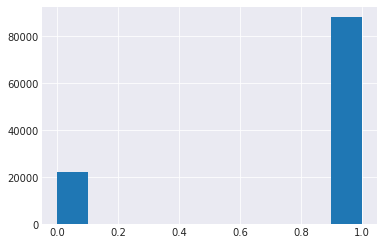

In [49]:
statistics(df1.show)

Minimum: 0
Maximum: 1
Median: 0.0
Mean: 0.201934386479


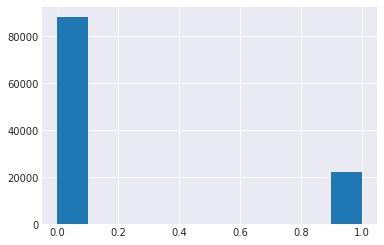

In [50]:
statistics(df1.no_show)

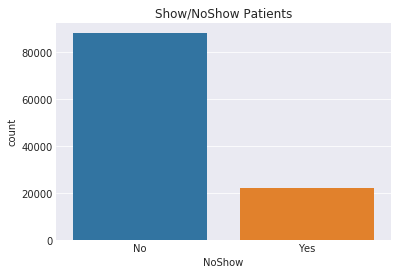

In [47]:
g = sns.countplot(x=df1.NoShow, data=df)
g.set_title("Show/NoShow Patients")
plt.show()

## Observation :

- data of no show patients more than 80 ,000
- out of 110,500 patients around 88,000 of them have turned up and that's around 80%.

### Research Question 2  (What is the effect of Gender on Show/No Show Rate ?)

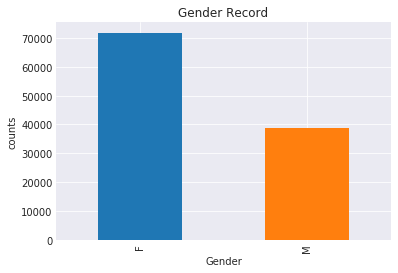

In [51]:
df1.Gender.value_counts().plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('Gender')
plt.title('Gender Record');

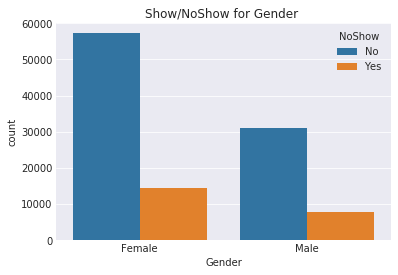

In [52]:
g = sns.countplot(x=df1.Gender, hue=df1.NoShow, data=df1)
g.set_title("Show/NoShow for Gender ")
x_ticks_labels=['Female', 'Male']
ax.set_xticklabels(x_ticks_labels)
plt.show()

## Observation :

- out of the 88,000 patients that have turned up, around 57,000 of them are Females and 31,000 are Males.
- out of the 22,500 patients that haven't come for the visit around 15,000 are Females and 7,500 are Males .
- Female patients usually have more appointments than Male patients. 

### Research Question 3 (What is the characterestics of Age groups ?)

Minimum: 0
Maximum: 115
Median: 37.0
Mean: 37.0892188263


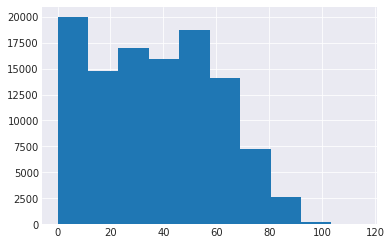

In [54]:
statistics(df1.Age)

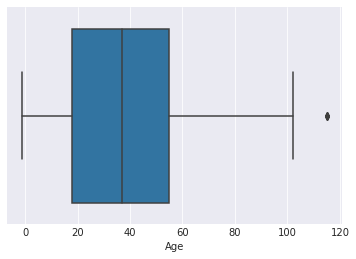

In [55]:
sns.boxplot(x=df.Age)

## Observation :
- the Median Age is around 35.
- the IQR is between 19 and 59.
- age group from 0 - 10 are the greatest in number . 


### Research Question 4 (What is the effect of Neighborhood names on Show/No Show Rate ?)

In [58]:
name = df1.Neighbourhood.unique()
name.sort()

In [59]:
name.size

81

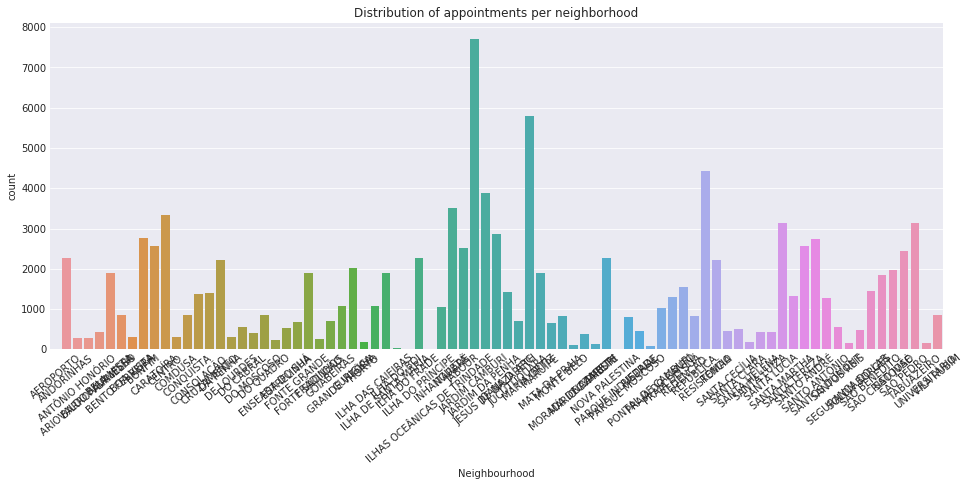

In [62]:
plt.figure(figsize=(16,6))
g = sns.countplot(x='Neighbourhood', data=df1, order=name)
g.set_xticklabels(ax.get_xticklabels(), rotation=40 )
plt.title('Distribution of appointments per neighborhood')
plt.show()

## Observation :
- there are 81 different neighborhood being considered, where 10 of them made more than 3000 appointments.

In [73]:
ratio = df[df.NoShow == 'No'].groupby(['Neighbourhood']).size()/df.groupby(['Neighbourhood']).size()

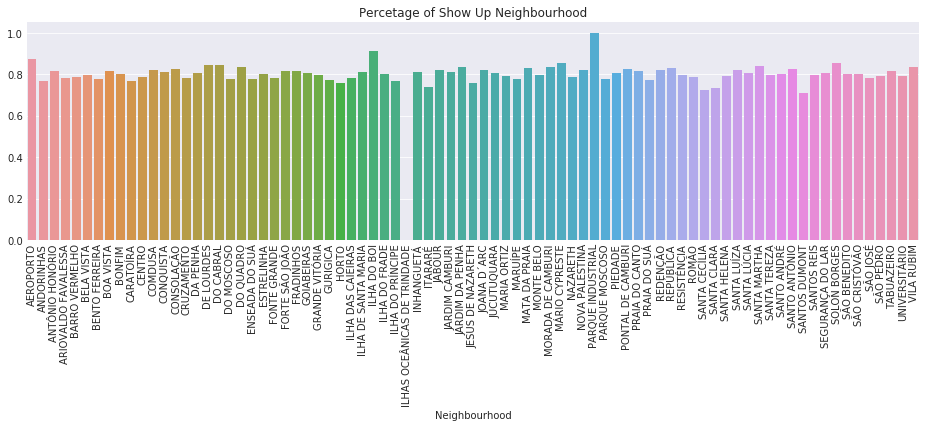

In [74]:
plt.figure(figsize=(16,4))
g = sns.barplot(x=ratio.index, y=ratio)
g.set_title("Percetage of Show Up Neighbourhood")
plt.xticks(rotation=90)
plt.show()

## Observation :
- **most of the Neighbourhood have around 80% Show rate.**

### Research Question 5 (What is the effect of SMSReceived on Show/No Show Rate ?)

Minimum: 0
Maximum: 1
Median: 0.0
Mean: 0.321025631746


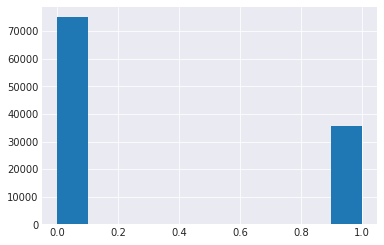

In [83]:
statistics(df1.SMSReceived)

## Observation :
- the number of patients who does't received any letter are more than the patients received sms.
- there are around 75,000 patients who have not received SMS and out of them around 84% have come for the visit.
 

### Research Question 6 (What is the effect of Handicap on Show/No Show Rate ?)

Minimum: 0
Maximum: 4
Median: 0.0
Mean: 0.0222479575126


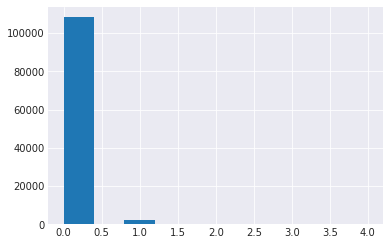

In [84]:
statistics(df1.Handicap)

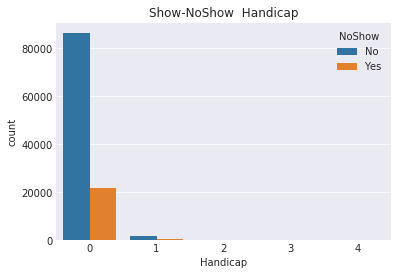

In [79]:
g = sns.countplot(x=df1.Handicap, hue=df1.NoShow, data=df1)
g.set_title("Show-NoShow  Handicap")
plt.show()

## Observation :
- there are around 110,000 patients without Handicap and out of them around 80% have come for the visit.

### Research Question 7 (What is the Relation between  Gender and Age  ?)

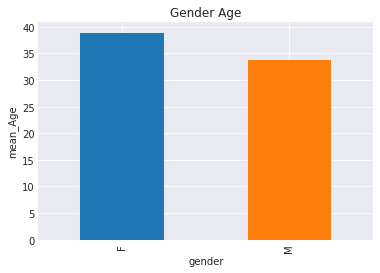

In [89]:
df1.groupby('Gender')['Age'].mean().plot(kind='bar')
plt.xlabel('gender')
plt.ylabel('mean_Age')
plt.title('Gender Age');

## Observation :
- female with greater age are more in the number .

### Research Question 8 (What is the relation between .No of Appointments and Age ?)

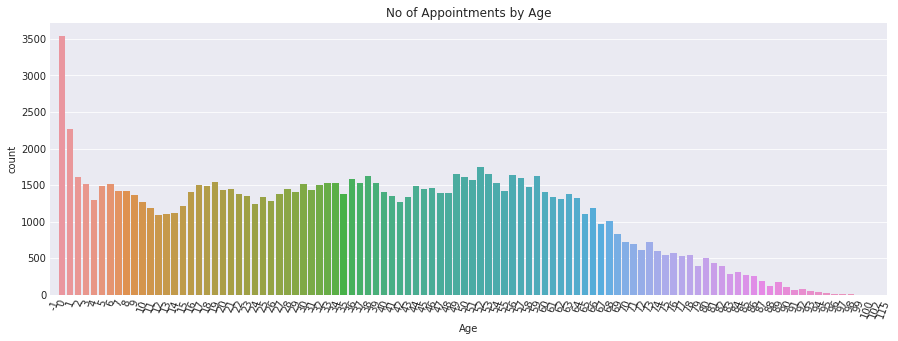

In [93]:
plt.figure(figsize=(15,5))
g = sns.countplot(x=df.Age)
g.set_title("No of Appointments by Age")
plt.xticks(rotation=70)
plt.show()

## Observation :
- there are peaks for the Babies Of age less than 1 (few month babies) and then the distribution starts to be uniform.
- after the Age of around 60 we see a right-skewed distribution.

### Research Question 9
### (What is the effect of the relation of .No of Appointments and Age on Show/No Show Rate ?)

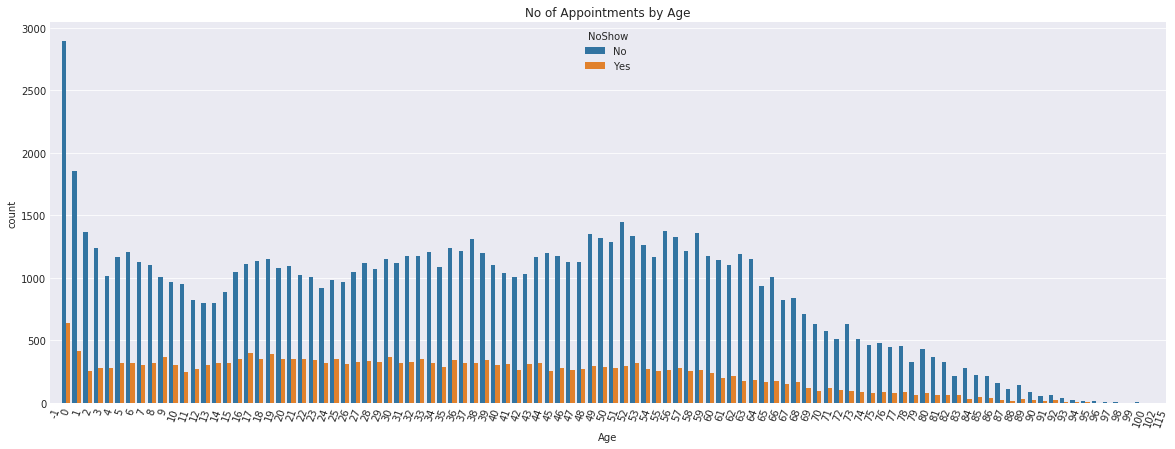

In [97]:
plt.figure(figsize=(20,7))
g = sns.countplot(x=df1.Age , hue=df1.NoShow)
g.set_title("No of Appointments by Age")
plt.xticks(rotation=70)
plt.show()

## Observation :
- The infants groups are the most who showed up for the appointment. 
- Also the non showed ration is greatest for the infants groups .
- this is the case of `Simpson paradox .`
- from approx agre 70 the graph decresed for the showed ups .

### `Simpson's paradox` :  which goes by several names, is a phenomenon in probability and statistics, in which a trend appears in several different groups of data but disappears or reverses when these groups are combined.

### Research Question 10 (What is the relation between .SMSReceived and Show/NoShow rate?)

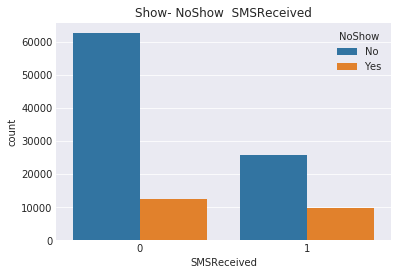

In [98]:
g = sns.countplot(x=df1.SMSReceived, hue=df1.NoShow, data=df1)
g.set_title("Show- NoShow  SMSReceived")
x_ticks_labels=['No SMS Received', 'SMS Received']
ax.set_xticklabels(x_ticks_labels)
plt.show()

## Observation :
- Out of the 35,500 patients who have received SMS around 72% of them have come for the visit.

## Conclusions :

- This analysis sought to explore the medical appointment no-shows dataset,  containing more than 100.000 appointments and of which approximately 30% of the patients have not attended

-  `Gender` may not play an important role in determining if a patient comes for a visit or not.
- Feamles made more appointments then man .
- we have clearly seen that most of the `Age` group patients have around 80% Show rate.
- The patients who attend to the appointments are older than those who don't.
- ` Neighbourhood` feature may not add much value while building a model to help us determine which segment of patients are tuning up for a visit the most.
-  `Handicap` feature will help us in determining if a patient will turn up for the visit after taking an appointment.
- `SMSReceived` feature will help us in determining if a patient will turn up for the visit after taking an appointment. 
- Most patients who have received SMS (72%) have attended to appointments scheduled

- Age , Handicap and SMSReceived can be the Independent Variables using which we can predict our Target Variable (Dependent variable) .

## Limitations :
- The data is provided of only 1 month , so it is difficult to predict and the analysis might not make a representation of the whole data.
- we don't have enough data.
- About Neighbourhood column , without knowing the details about the location and place can't say the result is accurate .
- according to visualization feamles are the one whose ration of not showing up is high , but we can't say wheather it's the case of SIMPSON PARADOX or not . ( area having more feamle population )


## RESOURCES HAS BEEN USED FOR THIS PROJECT :

1. [Kaggle ](https://www.kaggle.com/joniarroba/noshowappointments)
2. [My Git-Hub Repo](https://github.com/Swatichanchal/Data-Analysis)
3. [W3 School](https://www.w3schools.com/python/python_datetime.asp) for Date Time Conversion .
4. [Geeks for Geeks](https://www.geeksforgeeks.org/sort-sorteda-np-argsorta-np-lexsortb-python/)
5. [Wikipedia](https://en.wikipedia.org/wiki/Simpson%27s_paradox)

In [2]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset-Copy1.ipynb'])

0